In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

For this project we collected data from website : Carsdekho


In [2]:
#Loading the data collected from carsdekho
df1=pd.read_csv('cardekho.csv')

In [3]:
#Viewing top and bottom 5 rows
df1

Unnamed: 0 car_type   location     brand      model  \
0               0        -    Chennai    Maruti     Ertiga   
1               1        -    Chennai    Maruti    Wagon R   
2               2        -    Chennai   Hyundai      Verna   
3               3        -    Chennai    Maruti       Alto   
4               4        -    Chennai      Ford   Ecosport   
...           ...      ...        ...       ...        ...   
12065       12065        -  Ahmedabad    Maruti        SX4   
12066       12066        -  Ahmedabad    Maruti     Ertiga   
12067       12067        -  Ahmedabad  Mahindra     Quanto   
12068       12068        -  Ahmedabad   Hyundai  Grand i10   
12069       12069        -  Ahmedabad  Mahindra    Scorpio   

                          version  year fuel_type transmission_type  \
0                             VDI  2012    Diesel            Manual   
1                         AMT VXI  2018    Petrol         Automatic   
2                     CRDi 1.4 EX  2019    Diesel            Manual   
3                             LXi  2006    Petrol            Manual   
4             1.5 DV5 MT Titanium  2014    Diesel            Manual   
...                           ...   ...       ...               ...   
12065                         VDI  2012    Diesel            Manual   
12066                         LDI  2012    Diesel            Manual   
12067                          C8  2013    Diesel            Manual   
12068  1.2 Kappa Sportz Option AT  2018    Petrol         Automatic   
12069                 SLE 7S BSIV  2013    Diesel            Manual   

      distance_driven      price  
0          64,523 kms   6.1 Lakh  
1          29,000 kms  5.15 Lakh  
2          38,000 kms  9.55 Lakh  
3          91,500 kms   1.4 Lakh  
4          45,000 kms  6.25 Lakh  
...               ...        ...  
12065      90,000 kms     2 Lakh  
12066    1,20,000 kms  3.75 Lakh  
12067    1,40,000 kms  3.55 Lakh  
12068    1,00,000 kms   5.5 Lakh  
12069      90,000 kms   4.5 Lakh  

[12070 rows x 11 columns]

In [4]:
df1=df1.iloc[:,1:]
df1

car_type   location     brand      model                     version  \
0            -    Chennai    Maruti     Ertiga                         VDI   
1            -    Chennai    Maruti    Wagon R                     AMT VXI   
2            -    Chennai   Hyundai      Verna                 CRDi 1.4 EX   
3            -    Chennai    Maruti       Alto                         LXi   
4            -    Chennai      Ford   Ecosport         1.5 DV5 MT Titanium   
...        ...        ...       ...        ...                         ...   
12065        -  Ahmedabad    Maruti        SX4                         VDI   
12066        -  Ahmedabad    Maruti     Ertiga                         LDI   
12067        -  Ahmedabad  Mahindra     Quanto                          C8   
12068        -  Ahmedabad   Hyundai  Grand i10  1.2 Kappa Sportz Option AT   
12069        -  Ahmedabad  Mahindra    Scorpio                 SLE 7S BSIV   

       year fuel_type transmission_type distance_driven      price  
0      2012    Diesel            Manual      64,523 kms   6.1 Lakh  
1      2018    Petrol         Automatic      29,000 kms  5.15 Lakh  
2      2019    Diesel            Manual      38,000 kms  9.55 Lakh  
3      2006    Petrol            Manual      91,500 kms   1.4 Lakh  
4      2014    Diesel            Manual      45,000 kms  6.25 Lakh  
...     ...       ...               ...             ...        ...  
12065  2012    Diesel            Manual      90,000 kms     2 Lakh  
12066  2012    Diesel            Manual    1,20,000 kms  3.75 Lakh  
12067  2013    Diesel            Manual    1,40,000 kms  3.55 Lakh  
12068  2018    Petrol         Automatic    1,00,000 kms   5.5 Lakh  
12069  2013    Diesel            Manual      90,000 kms   4.5 Lakh  

[12070 rows x 10 columns]

In [5]:
#Splitted the data frame and considered the required part
df1['price']=df1['price'].str.split(' ',expand=True)[0]

In [6]:
df1['price']

0         6.1
1        5.15
2        9.55
3         1.4
4        6.25
         ... 
12065       2
12066    3.75
12067    3.55
12068     5.5
12069     4.5
Name: price, Length: 12070, dtype: object

In [7]:
#Splitted by space and removed kms
df1['distance_driven']=df1['distance_driven'].str.split(' ',expand=True)[0]

In [8]:
#replacing the , between numbers with ''
df1['distance_driven']=df1['distance_driven'].str.replace(',','')

In [9]:
#Let us check data types
df1.dtypes

car_type             object
location             object
brand                object
model                object
version              object
year                  int64
fuel_type            object
transmission_type    object
distance_driven      object
price                object
dtype: object

Still the distance_driven and price are in object. Let us change their data type

In [10]:
#Replaced the , with '' and divide with lakh
y=[]
x=df1['price'].str.split(expand=True)[0]
for i in x:
    if  ',' in i:
        temp=float(i.replace(',',''))
        convert=temp/100000
        y.append(convert)
    else :
        y.append(i)
df1['price']=y
df1['price']

0         6.1
1        5.15
2        9.55
3         1.4
4        6.25
         ... 
12065       2
12066    3.75
12067    3.55
12068     5.5
12069     4.5
Name: price, Length: 12070, dtype: object

In [11]:
#Now let us convert
df1['price']=pd.to_numeric(df1['price'])

Now it is converted to float type

In [12]:
#Simillarly let us convert the distance column
df1['distance_driven']=pd.to_numeric(df1['distance_driven'])

Now this is in int format

In [13]:
#Let us see the brief info now
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12070 entries, 0 to 12069
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_type           12070 non-null  object 
 1   location           12070 non-null  object 
 2   brand              12070 non-null  object 
 3   model              12068 non-null  object 
 4   version            12070 non-null  object 
 5   year               12070 non-null  int64  
 6   fuel_type          12070 non-null  object 
 7   transmission_type  12070 non-null  object 
 8   distance_driven    12070 non-null  int64  
 9   price              12070 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 943.1+ KB


we can see there are some null values in column model and price. They are very minute. So let us drop those rows

In [14]:
#Removed rows with null values
df1.dropna(inplace=True)

In [15]:
#Shape after null values
df1.shape

(12068, 10)

12068 rows and 10 columns, i.e 3 rows removed

In [16]:
#Seeing the list of columns
df1.columns

Index(['car_type', 'location', 'brand', 'model', 'version', 'year',
       'fuel_type', 'transmission_type', 'distance_driven', 'price'],
      dtype='object')

We see there are no values in column car_type, let us drop the column

In [17]:
df1.drop(['car_type'], axis=1, inplace=True)

In [18]:
df1.columns

Index(['location', 'brand', 'model', 'version', 'year', 'fuel_type',
       'transmission_type', 'distance_driven', 'price'],
      dtype='object')

In [19]:
#Let us see the year column
df1['year']

0        2012
1        2018
2        2019
3        2006
4        2014
         ... 
12065    2012
12066    2012
12067    2013
12068    2018
12069    2013
Name: year, Length: 12068, dtype: int64

In [20]:
#In general the older the car, the less resale value. So let us convert this column into no. of years old
df1['year']=2021-df1['year']
df1['year']

0         9
1         3
2         2
3        15
4         7
         ..
12065     9
12066     9
12067     8
12068     3
12069     8
Name: year, Length: 12068, dtype: int64

Now we got how many years old the car is

In [21]:
df1

location     brand      model                     version  year  \
0        Chennai    Maruti     Ertiga                         VDI     9   
1        Chennai    Maruti    Wagon R                     AMT VXI     3   
2        Chennai   Hyundai      Verna                 CRDi 1.4 EX     2   
3        Chennai    Maruti       Alto                         LXi    15   
4        Chennai      Ford   Ecosport         1.5 DV5 MT Titanium     7   
...          ...       ...        ...                         ...   ...   
12065  Ahmedabad    Maruti        SX4                         VDI     9   
12066  Ahmedabad    Maruti     Ertiga                         LDI     9   
12067  Ahmedabad  Mahindra     Quanto                          C8     8   
12068  Ahmedabad   Hyundai  Grand i10  1.2 Kappa Sportz Option AT     3   
12069  Ahmedabad  Mahindra    Scorpio                 SLE 7S BSIV     8   

      fuel_type transmission_type  distance_driven  price  
0        Diesel            Manual            64523   6.10  
1        Petrol         Automatic            29000   5.15  
2        Diesel            Manual            38000   9.55  
3        Petrol            Manual            91500   1.40  
4        Diesel            Manual            45000   6.25  
...         ...               ...              ...    ...  
12065    Diesel            Manual            90000   2.00  
12066    Diesel            Manual           120000   3.75  
12067    Diesel            Manual           140000   3.55  
12068    Petrol         Automatic           100000   5.50  
12069    Diesel            Manual            90000   4.50  

[12068 rows x 9 columns]

Exploring the individual columns 

In [22]:
#Exploring location column
df1['location'].nunique()

9

there are 9 different locations

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Delhi NCR    3059
Mumbai       2934
Bangalore    1485
Pune         1231
Chennai       914
Hyderabad     874
Kolkata       632
Ahmedabad     487
Jaipur        452
Name: location, dtype: int64


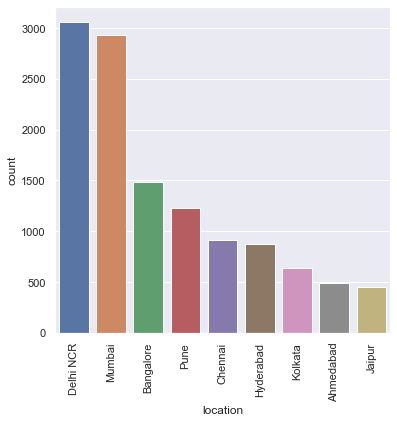

In [23]:
plt.figure(figsize=(6,6))
sns.set(style='darkgrid')
order=df1['location'].value_counts().index
sns.countplot(df1['location'],order=order)
plt.xticks(rotation=90)
print(df1['location'].value_counts())

In [26]:
#Making a function since we repeat this several times
def explore(a):
    plt.figure(figsize=(10,10))
    sns.set(style='darkgrid')
    order=df1[f'{a}'].value_counts().index
    x=sns.countplot(df1[f'{a}'],order=order)
    plt.xticks(rotation=90)
    print('unique values: ',df1[a].nunique())
    print(df1[f'{a}'].value_counts())
    return x

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


unique values:  34
Maruti           3225
Hyundai          2392
Honda            1182
Toyota            760
Mahindra          566
Volkswagen        520
Ford              506
Mercedes-Benz     455
Renault           378
BMW               359
Audi              311
Tata              304
Skoda             266
Chevrolet         146
Nissan            134
Land               74
Jaguar             65
Kia                64
Jeep               60
MG                 57
Datsun             56
Volvo              47
Porsche            40
Fiat               30
Mini               30
Mitsubishi         17
Lexus               6
Isuzu               5
Bentley             3
Aston               3
Maserati            2
Force               2
Lamborghini         2
ICML                1
Name: brand, dtype: int64


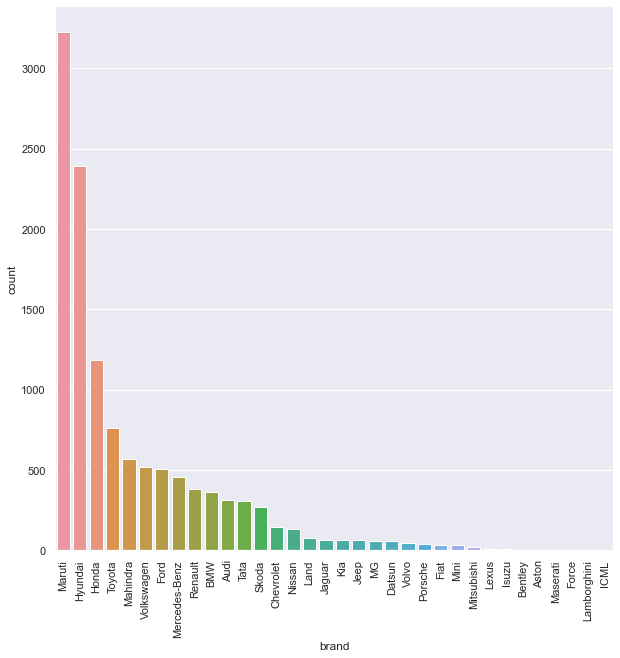

In [27]:
explore('brand')

In [28]:
#Replacing the brand name
df1['brand']=df1['brand'].str.replace('Land','Landrover')
df1['brand']=df1['brand'].str.replace('Mini','Mini Cooper')

We changed the brand names successfully

In [29]:
#Unique brands to a list
car_brands=df1['brand'].unique()
car_brands

array(['Maruti', 'Hyundai', 'Ford', 'Honda', 'Toyota', 'Mahindra',
       'Landrover', 'BMW', 'Mercedes-Benz', 'Nissan', 'Datsun',
       'Volkswagen', 'Jeep', 'Chevrolet', 'Renault', 'Tata', 'Kia',
       'Skoda', 'Audi', 'MG', 'Mitsubishi', 'Fiat', 'Jaguar', 'Volvo',
       'Lexus', 'Mini Cooper', 'Porsche', 'Isuzu', 'Aston', 'Bentley',
       'Force', 'ICML', 'Lamborghini', 'Maserati'], dtype=object)

In [30]:
#Listing premium cars
counts= df1['brand'].value_counts()
premium_cars = df1[df1['brand'].isin(counts[counts < 15].index)]

In [31]:
#viewing premium cars data
premium_cars

location        brand           model                       version  \
1081   Hyderabad        Lexus              LS             500h Ultra Luxury   
2720   Delhi NCR        Isuzu            MU 7                           4x2   
2722   Delhi NCR        Aston   Martin Rapide                           V12   
3404   Delhi NCR        Isuzu           D-Max                      Standard   
3527   Delhi NCR        Lexus              ES                300h Exquisite   
3745   Delhi NCR      Bentley     Continental          GT Speed Convertible   
3885   Delhi NCR        Lexus              ES                   300h Luxury   
4118   Delhi NCR        Lexus              NX                   300h Luxury   
4431   Delhi NCR        Force             One                 4X2 6 Seating   
6094   Bangalore         ICML        Rhino Rx  Royale CRDFi 8 Seater BS III   
6129   Bangalore  Lamborghini            Urus                            V8   
6146   Bangalore  Lamborghini            Urus                            V8   
6267   Bangalore        Lexus              NX                          300h   
8509      Mumbai      Bentley     Continental                            GT   
8605      Mumbai     Maserati         Levante                   Diesel BSIV   
8614      Mumbai     Maserati         Levante                   Diesel BSIV   
9258      Mumbai        Lexus              LX                           SUV   
9437      Mumbai        Isuzu            MU-X                           4X2   
9561      Mumbai      Bentley     Continental              Flying Spur BSIV   
9597      Mumbai        Isuzu            MU-X                           4X2   
9644      Mumbai        Aston  Martin Vantage                       V8 4.7L   
10270     Mumbai        Aston   Martin Rapide                           V12   
10742       Pune        Isuzu           D-Max                           4X4   
11986  Ahmedabad        Force             One                  SX 7 Seating   

       year fuel_type transmission_type  distance_driven  price  
1081      2    Petrol         Automatic             3500   1.69  
2720      6    Diesel            Manual            99000  13.00  
2722      9    Petrol         Automatic            20690  87.50  
3404      2    Diesel            Manual            35000  14.25  
3527      1    Petrol         Automatic            12000  57.90  
3745     14    Petrol         Automatic            29000  81.00  
3885      4    Petrol         Automatic            32000  39.50  
4118      3    Petrol         Automatic            43500  46.00  
4431      9    Diesel            Manual            50000   3.50  
6094     11    Diesel            Manual           110000   1.60  
6129      0    Petrol         Automatic             5300   3.08  
6146      0    Petrol         Automatic             5300   3.08  
6267      3    Petrol         Automatic             7622  63.95  
8509     13    Petrol         Automatic             6000  75.00  
8605      4    Diesel         Automatic            24000   1.30  
8614      4    Diesel         Automatic            24000   1.30  
9258     20    Diesel         Automatic           151000  25.00  
9437      4    Diesel         Automatic            26618  17.00  
9561     11    Petrol         Automatic            49000  76.00  
9597      4    Diesel         Automatic            41000  21.75  
9644      8    Petrol         Automatic            18000  74.85  
10270     9    Petrol         Automatic             7800   1.25  
10742     4    Diesel            Manual            49500  16.25  
11986     8    Diesel            Manual           113263   2.23

In [32]:
#New data frame without premium cars / models with less data
counts= df1['brand'].value_counts()
df_new = df1[~df1['brand'].isin(counts[counts < 15].index)]
df_new.shape

(12044, 9)

no. of rows removed - 24 very less %.  

In [33]:
#Checking 
df_new['brand'].value_counts()

Maruti           3225
Hyundai          2392
Honda            1182
Toyota            760
Mahindra          566
Volkswagen        520
Ford              506
Mercedes-Benz     455
Renault           378
BMW               359
Audi              311
Tata              304
Skoda             266
Chevrolet         146
Nissan            134
Landrover          74
Jaguar             65
Kia                64
Jeep               60
MG                 57
Datsun             56
Volvo              47
Porsche            40
Fiat               30
Mini Cooper        30
Mitsubishi         17
Name: brand, dtype: int64

Now we made a new data set with data of car brands more than 15

In [34]:
mean_by_brand=df_new.groupby(['brand']).mean()
mean_by_brand

year  distance_driven      price
brand                                               
Audi            6.855305     62521.456592  20.307846
BMW             6.718663     56468.623955  25.276741
Chevrolet       9.205479     71692.753425   2.564589
Datsun          4.232143     32099.178571   3.073393
Fiat            8.866667     86281.866667   2.787333
Ford            6.294466     63445.306324   7.833478
Honda           6.743655     54343.340948   5.553054
Hyundai         6.645903     54289.276756   5.314835
Jaguar          5.600000     47759.646154  32.317692
Jeep            2.950000     35911.033333  17.362667
Kia             1.218750     18352.437500  16.945938
Landrover       5.675676     59412.851351  33.755000
MG              1.105263     45033.175439  18.597895
Mahindra        5.832155     66443.796820   8.058940
Maruti          6.332093     54241.678760   4.610073
Mercedes-Benz   6.274725     50448.520879  28.028132
Mini Cooper     5.400000     27265.600000  27.444667
Mitsubishi     11.058824     76161.470588   7.091765
Nissan          6.902985     63865.649254   4.027388
Porsche         6.150000     41711.950000  53.602000
Renault         4.865079     45636.261905   4.416138
Skoda           6.860902     63936.951128   8.970789
Tata            5.707237     55720.348684   5.233267
Toyota          7.065789     89786.351316  11.232737
Volkswagen      6.784615     60581.132692   5.307346
Volvo           5.808511     63854.617021  27.148936

from above we can see mean values of year, km driven and price by brand.

<BarContainer object of 12044 artists>

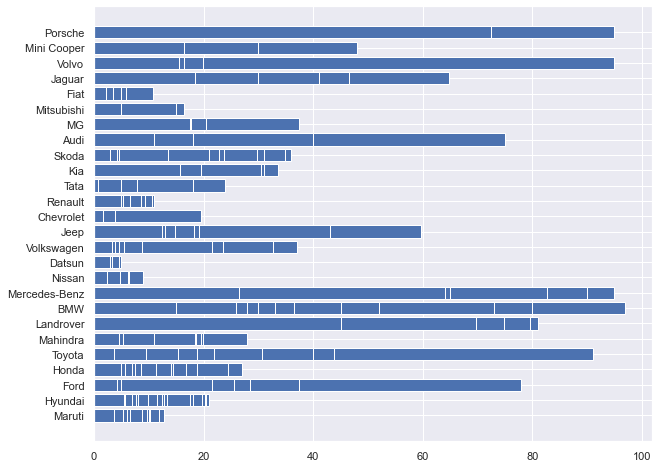

In [35]:
# price with respect to brand
plt.figure(figsize = (10, 8))
plt.barh(df_new['brand'],df_new['price'])

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


unique values:  288
i20                    578
City                   509
Swift                  500
Grand i10              470
Wagon R                431
                      ... 
Koleos                   1
Karoq                    1
X7                       1
Indica Xeta              1
E-Class All-Terrain      1
Name: model, Length: 288, dtype: int64


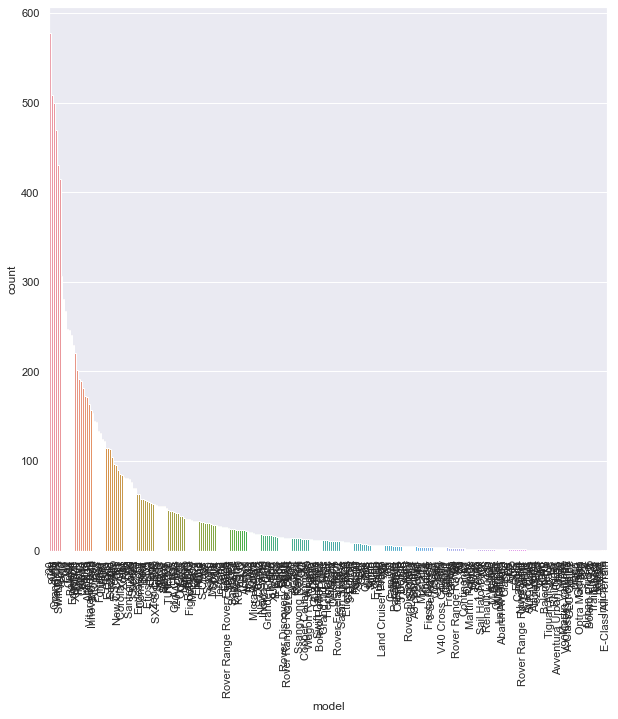

In [36]:
explore('model')

In [37]:
#Dropping the rows of models with data less than 20
counts= df1['model'].value_counts()
df_new = df1[~df1['model'].isin(counts[counts < 20].index)]
df_new.shape

(10993, 9)

In [38]:
10993/12044

0.9127366323480571

9% of data is lost.

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


unique values:  2129
VXI          378
LXI          209
VDI          209
Sportz       193
Magna        157
            ... 
C6             1
1.6 SXi        1
2.7 ZX AT      1
LX NON AC      1
Lxi BSIII      1
Name: version, Length: 2129, dtype: int64


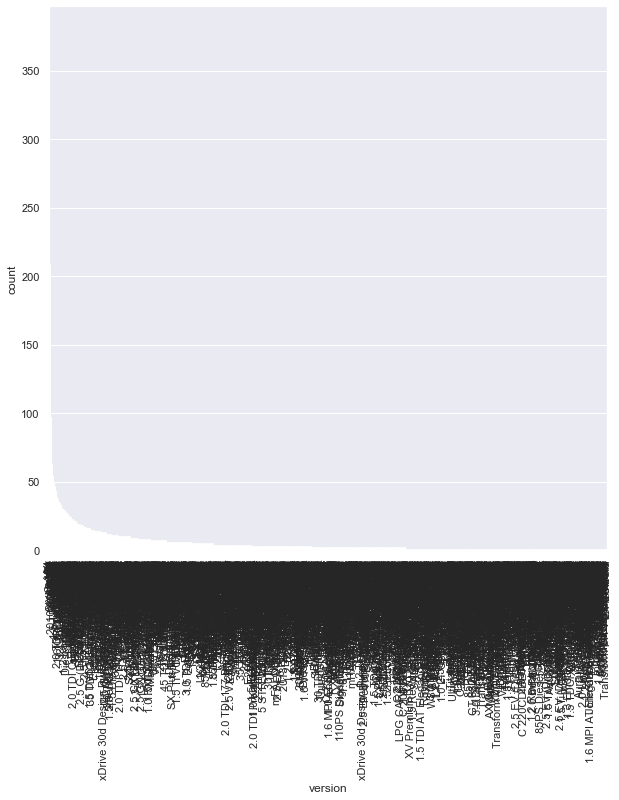

In [39]:
#exploring the column version 
explore('version')

In [40]:
df_new.drop(['version'],axis=1, inplace=True)

C:\Users\Lucky Girish\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now the column version is dropped

In [41]:
df_new.columns

Index(['location', 'brand', 'model', 'year', 'fuel_type', 'transmission_type',
       'distance_driven', 'price'],
      dtype='object')

unique values:  5
Petrol      6564
Diesel      5334
CNG          130
LPG           29
Electric      11
Name: fuel_type, dtype: int64


C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


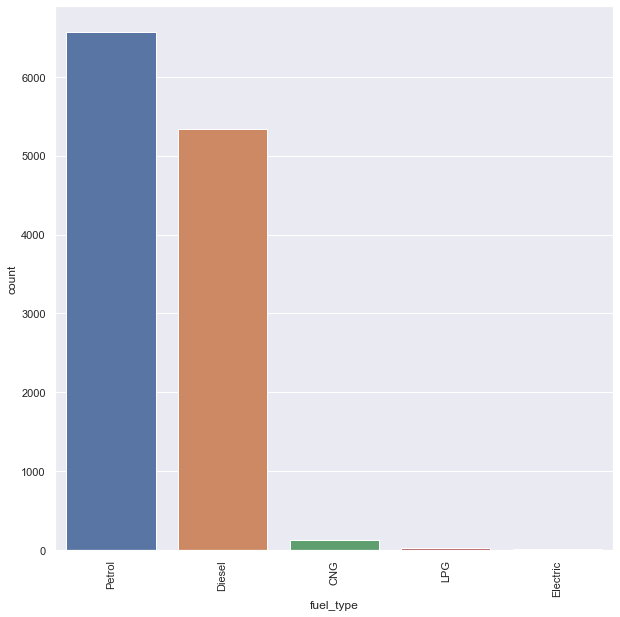

In [42]:
explore('fuel_type')

Majority of data is of  petrol and Diesel Cars

In [43]:
mean_by_fuel=df_new.groupby('fuel_type').mean()
mean_by_fuel

year  distance_driven      price
fuel_type                                       
CNG         6.277778     60479.666667   3.768016
Diesel      6.301379     70729.658961  10.446471
LPG        11.423077     67726.615385   2.050000
Petrol      6.493144     47892.028730   5.485574

<BarContainer object of 10993 artists>

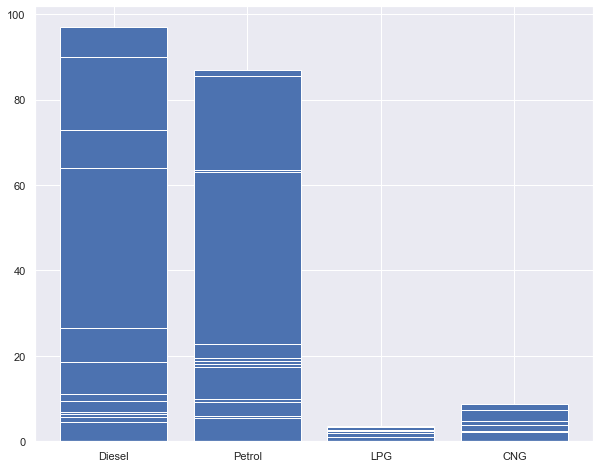

In [44]:
# price with respect to fuel type
plt.figure(figsize = (10, 8))
plt.bar(df_new['fuel_type'],df_new['price'])

Diesel cars are having more cost. LPG are less cost

unique values:  2
Manual       8708
Automatic    3360
Name: transmission_type, dtype: int64


C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


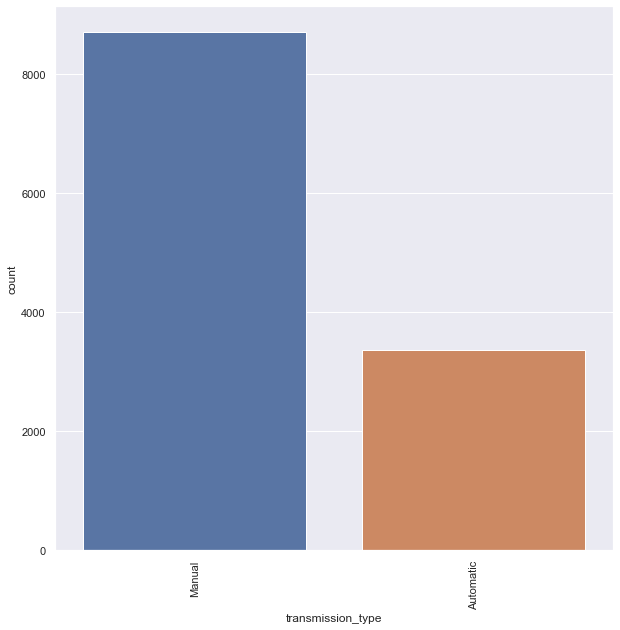

In [45]:
explore('transmission_type')

There are two types of transmissions. Manual and Automatic.

In [46]:
mean_by_transmission=df_new.groupby('transmission_type').mean()
mean_by_transmission

year  distance_driven      price
transmission_type                                      
Automatic          5.669113     52152.660727  14.443442
Manual             6.684418     59893.902964   5.171649

Automatic have mean price of 14.44 lakhs

<BarContainer object of 10993 artists>

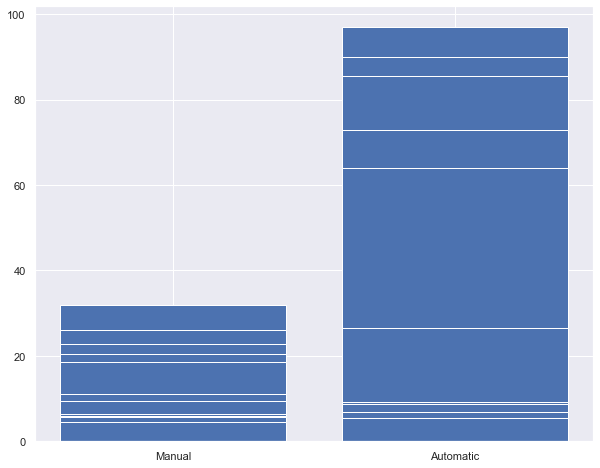

In [47]:
# price with respect to transmission type
plt.figure(figsize = (10, 8))
plt.bar(df_new['transmission_type'],df_new['price'])

Cars of automatic transmisson are more costlier

<BarContainer object of 10993 artists>

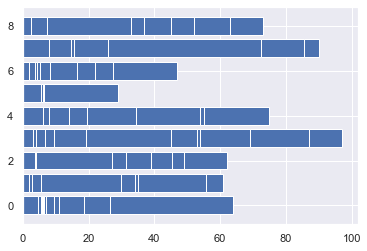

In [62]:
#Prices based on location
plt.barh(df_new['location'],df_new['price'])

<Figure size 720x720 with 0 Axes>

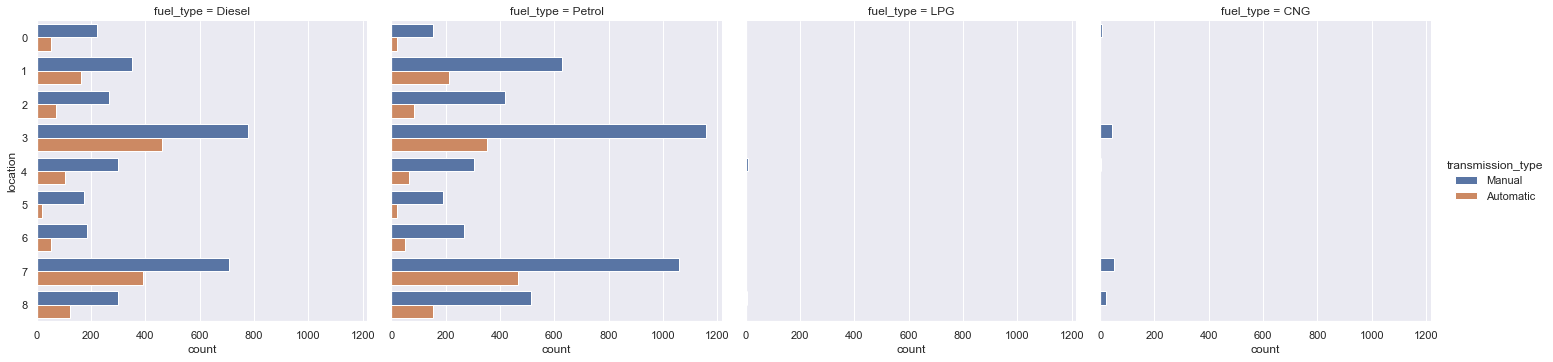

In [64]:
#Number of cars in each city based on type of fuel and transmission
plt.figure(figsize=(10,10))
sns.catplot(y="location", hue="transmission_type", col="fuel_type",
                data=df_new, kind="count")


Exploring the numerical column 

In [48]:
#df_new.dtypes

In [49]:
df_new.describe()

year  distance_driven         price
count  10993.000000     1.099300e+04  10993.000000
mean       6.420086     5.787849e+04      7.585537
std        3.225992     4.582001e+04      8.041018
min        0.000000     1.010000e+02      0.480000
25%        4.000000     3.400000e+04      3.490000
50%        6.000000     5.400000e+04      5.210000
75%        9.000000     7.500000e+04      8.000000
max       22.000000     2.150000e+06     96.990000

In [50]:
#To show entire number instead of +xx while describe function
pd.options.display.float_format = "{:.2f}".format

In [51]:
df_new.describe()

year  distance_driven    price
count 10993.00         10993.00 10993.00
mean      6.42         57878.49     7.59
std       3.23         45820.01     8.04
min       0.00           101.00     0.48
25%       4.00         34000.00     3.49
50%       6.00         54000.00     5.21
75%       9.00         75000.00     8.00
max      22.00       2150000.00    96.99

In [52]:
#Pivoting for better views
df_pivot=pd.pivot_table(df_new,index=['brand','fuel_type'], columns=['transmission_type'],values=['price'])
df_pivot

price       
transmission_type       Automatic Manual
brand         fuel_type                 
Audi          Diesel        18.69  23.67
              Petrol        22.99    nan
BMW           Diesel        23.95    nan
              Petrol        16.06    nan
Chevrolet     Diesel         4.52   2.42
              LPG             nan   1.06
              Petrol          nan   1.47
Datsun        Petrol         4.00   2.83
Ford          Diesel        25.38   4.86
              Petrol         7.40   4.74
Honda         Diesel        14.10   5.85
              Petrol         6.56   5.02
Hyundai       CNG             nan   3.11
              Diesel         9.83   5.81
              LPG             nan   2.53
              Petrol         6.95   4.46
Jaguar        Diesel        23.91    nan
Jeep          Diesel        27.82  14.81
              Petrol        17.74  13.00
Kia           Diesel        17.26  14.65
              Petrol        17.31  13.68
Landrover     Diesel        31.91    nan
              Petrol        46.50    nan
MG            Diesel          nan  18.52
              Petrol        17.73    nan
Mahindra      CNG             nan   4.63
              Diesel        11.37   7.65
              Petrol        18.22   6.51
Maruti        CNG             nan   3.88
              Diesel         7.98   5.68
              LPG             nan   1.84
              Petrol         5.34   3.86
Mercedes-Benz Diesel        25.46  10.34
              Petrol        25.33  10.90
Nissan        Diesel         8.90   4.24
              Petrol         4.56   3.45
Porsche       Diesel        45.76    nan
              Petrol        36.28    nan
Renault       Diesel         8.32   4.96
              Petrol         4.95   3.86
Skoda         Diesel        10.88   5.09
              Petrol        12.94   6.78
Tata          CNG             nan   1.68
              Diesel        10.33   4.78
              Petrol         5.88   3.63
Toyota        Diesel        19.67  10.42
              Petrol        10.26   5.26
Volkswagen    Diesel         6.47   4.39
              Petrol         6.57   4.61

Based on brand and fuel type we see the average price 

In [53]:
pd.set_option('display.max_rows', 500)
df_pivot_model=pd.pivot_table(df_new,index=['brand','model','fuel_type'], columns=['location','transmission_type'],values=['price'])
df_pivot_model

price                   \
location                                         Ahmedabad        Bangalore   
transmission_type                                Automatic Manual Automatic   
brand         model                    fuel_type                              
Audi          A4                       Diesel        18.00    nan     11.00   
                                       Petrol          nan    nan       nan   
              A6                       Diesel        16.90    nan     25.14   
                                       Petrol          nan    nan       nan   
              Q3                       Diesel        12.25    nan     23.48   
                                       Petrol          nan    nan     29.75   
              Q5                       Diesel        40.00    nan     22.48   
                                       Petrol          nan    nan       nan   
              Q7                       Diesel        23.00    nan       nan   
BMW           3 Series                 Diesel        25.91    nan     15.25   
                                       Petrol          nan    nan      7.50   
              5 Series                 Diesel        14.95    nan     16.25   
                                       Petrol          nan    nan      6.89   
              7 Series                 Diesel          nan    nan     15.10   
                                       Petrol          nan    nan       nan   
              X1                       Diesel        21.01    nan     13.37   
                                       Petrol          nan    nan      9.85   
              X3                       Diesel          nan    nan     14.50   
                                       Petrol          nan    nan       nan   
              X5                       Diesel          nan    nan     34.40   
Chevrolet     Beat                     Diesel          nan   1.74       nan   
                                       Petrol          nan    nan       nan   
              Cruze                    Diesel         3.90   3.70      4.95   
              Spark                    LPG             nan    nan       nan   
                                       Petrol          nan   0.55       nan   
Datsun        RediGO                   Petrol         4.65   2.92      3.78   
Ford          Ecosport                 Diesel          nan   5.20       nan   
                                       Petrol          nan   5.25      9.46   
              Endeavour                Diesel        22.88    nan     27.16   
              Fiesta                   Diesel          nan    nan       nan   
                                       Petrol          nan    nan       nan   
              Figo                     Diesel          nan   2.35       nan   
                                       Petrol          nan   1.14       nan   
              Figo Aspire              Diesel          nan    nan       nan   
                                       Petrol         5.50   5.90       nan   
Honda         Accord                   Petrol         4.15   4.95      5.25   
              Amaze                    Diesel          nan   4.07       nan   
                                       Petrol         5.71   5.25      8.30   
              BR-V                     Diesel          nan   6.90       nan   
                                       Petrol          nan    nan      8.65   
              Brio                     Petrol         4.50   4.38       nan   
              CR-V                     Diesel          nan    nan       nan   
                                       Petrol          nan   2.50     10.40   
              City                     Diesel          nan   6.26       nan   
                                       Petrol         5.76   6.69     10.41   
              Civic                    Diesel          nan    nan       nan   
                                       Petrol         1.95   2.88       nan   
              Jazz      

From above we can see the average price by each model in brand based on fuel and transmission type in different cities

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.4726957214279264


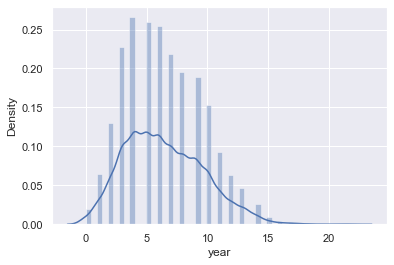

In [54]:
sns.distplot(df_new['year'])
print(df_new['year'].skew())

Skewness in acceptable range

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


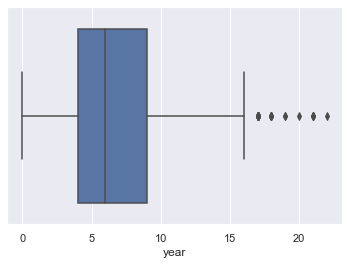

In [55]:
#Year
sns.boxplot(df_new['year'])

Outliers are present

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


16.242334466265692


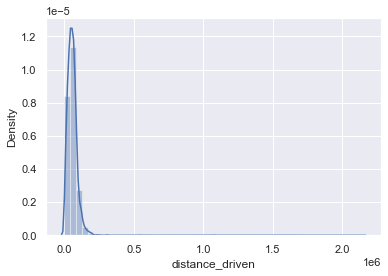

In [56]:
sns.distplot(df_new['distance_driven'])
print(df_new['distance_driven'].skew())

skewness is too high. we need to reduce

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


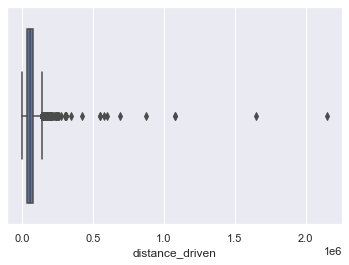

In [57]:
sns.boxplot(df_new['distance_driven'])

There are many outliers

Encoding the categorical columns

In [58]:
df_new.columns

Index(['location', 'brand', 'model', 'year', 'fuel_type', 'transmission_type',
       'distance_driven', 'price'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder
df_encoded=df_new
le=LabelEncoder()
df_encoded['location']=le.fit_transform(df_encoded['location'])
print(df_encoded['location'].value_counts())

3    2799
7    2679
1    1356
8    1111
2     838
4     784
6     559
0     456
5     411
Name: location, dtype: int64


<ipython-input-60-4f4e583cc625>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['location']=le.fit_transform(df_encoded['location'])


Encoding will be done and numbered as per dictionary order

In [66]:
#Encoding Brand
df_encoded['brand']=le.fit_transform(df_encoded['brand'])
print(df_encoded['brand'].value_counts())

13    3116
6     2343
5     1182
20     691
21     500
4      487
12     477
14     362
17     338
1      324
0      273
18     242
19     168
15     112
2      111
8       58
9       50
11      45
3       35
7       31
10      25
16      23
Name: brand, dtype: int64


<ipython-input-66-f985303c3ff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['brand']=le.fit_transform(df_encoded['brand'])


In [67]:
#Encoding model
df_encoded['model']=le.fit_transform(df_encoded['model'])
print(df_encoded['model'].value_counts())

104    578
22     509
81     500
44     470
93     431
82     415
90     307
103    281
62     267
21     247
26     246
13     241
31     230
10     220
98     202
48     192
53     189
20     182
88     172
35     171
9      164
91     157
49     154
8      145
50     143
39     134
41     131
28     125
30     122
16     115
29     114
66     113
76     105
7       97
1       96
59      90
94      86
25      84
99      82
5       81
68      81
75      80
86      77
80      70
0       70
34      63
4       63
24      58
14      57
71      56
63      55
37      54
32      53
85      52
102     52
72      51
92      50
77      50
46      50
79      50
89      47
45      45
36      44
83      44
64      43
105     42
42      42
23      39
61      39
60      36
67      35
56      35
11      35
40      34
18      33
55      33
33      33
58      33
101     32
70      32
74      31
65      31
97      31
100     30
17      28
57      28
78      28
84      27
96      27
27      26
51      26

<ipython-input-67-1baf3b82f567>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['model']=le.fit_transform(df_encoded['model'])


In [68]:
#Encoding fuel type
df_encoded['fuel_type']=le.fit_transform(df_encoded['fuel_type'])
print(df_encoded['fuel_type'].value_counts())

3    6126
1    4715
0     126
2      26
Name: fuel_type, dtype: int64


<ipython-input-68-06b3f9be0cf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['fuel_type']=le.fit_transform(df_encoded['fuel_type'])


In [69]:
#Encoding transmission type
df_encoded['transmission_type']=le.fit_transform(df_encoded['transmission_type'])
print(df_encoded['transmission_type'].value_counts())

1    8131
0    2862
Name: transmission_type, dtype: int64


<ipython-input-69-5a7b41202f69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['transmission_type']=le.fit_transform(df_encoded['transmission_type'])


In [61]:
#Removing outliers
import scipy
from scipy.stats import zscore

In [71]:
df_new.shape

(10993, 8)

In [70]:
b=abs(zscore(df_encoded))
x=df_encoded[(b<3).all(axis=1)]
x.shape

(10666, 8)

In [ ]:
outliers removed

In [73]:
1-(10666/10993)

0.02974620212862733

3% of data is lost after removing outliers acceptable

In [75]:
1-(10666/12070)

0.11632145816072903

Total data loss from original dataset to till now : 11.6% 

In [76]:
#Let us see skewness now
df_encoded.skew()

location             0.02
brand                0.16
model                0.01
year                 0.47
fuel_type           -0.28
transmission_type   -1.09
distance_driven     16.24
price                3.73
dtype: float64

skewness is to be considered only for distance, remaining all categorical columns, 

In [78]:
df_encoded['distance_driven'].describe()

count     10993.00
mean      57878.49
std       45820.01
min         101.00
25%       34000.00
50%       54000.00
75%       75000.00
max     2150000.00
Name: distance_driven, dtype: float64

In [79]:
#Reducing skewness in column distance_driven - log transormation
df_encoded['distance_driven']=np.log(df_encoded['distance_driven'])

<ipython-input-79-88de75b725af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['distance_driven']=np.log(df_encoded['distance_driven'])


In [81]:
df_encoded['distance_driven'].skew()

-1.4945608827190497

reduced to -1.5 from 16.24

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


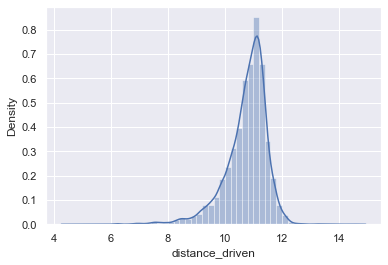

In [82]:
sns.distplot(df_encoded['distance_driven'])

better compared to earlier

In [83]:
#Let us see the correlatio
cor=df_encoded.corr()
cor

location  brand  model  year  fuel_type  transmission_type  \
location               1.00   0.01   0.02  0.06       0.02              -0.04   
brand                  0.01   1.00   0.10 -0.04      -0.06               0.12   
model                  0.02   0.10   1.00  0.05      -0.04               0.13   
year                   0.06  -0.04   0.05  1.00       0.03               0.14   
fuel_type              0.02  -0.06  -0.04  0.03       1.00               0.06   
transmission_type     -0.04   0.12   0.13  0.14       0.06               1.00   
distance_driven       -0.03   0.05   0.04  0.52      -0.30               0.12   
price                 -0.02  -0.08  -0.11 -0.36      -0.28              -0.51   

                   distance_driven  price  
location                     -0.03  -0.02  
brand                         0.05  -0.08  
model                         0.04  -0.11  
year                          0.52  -0.36  
fuel_type                    -0.30  -0.28  
transmission_type             0.12  -0.51  
distance_driven               1.00  -0.20  
price                        -0.20   1.00

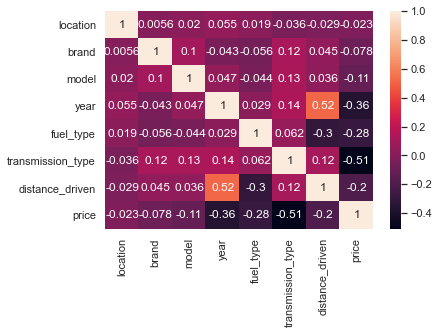

In [89]:
#Viewing the correlation
sns.heatmap(cor, annot=True)

In [90]:
#Splitting the target from features
x=df_encoded.drop('price',axis=1)
y=df_encoded['price']

In [93]:
print('x:',x.shape)
print('y:',y.shape)

x: (10993, 7)
y: (10993,)


Let us scale the the x variables

In [95]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled=scale.fit_transform(x)

In [96]:
x_scaled

array([[-0.93072007,  0.43754549, -0.63226132, ..., -1.09405442,
         0.59328427,  0.4385786 ],
       [-0.93072007,  0.43754549,  1.17198348, ...,  0.885363  ,
        -1.68553264, -0.64214083],
       [-0.93072007, -0.78662419,  1.07866048, ..., -1.09405442,
         0.59328427, -0.27688068],
       ...,
       [-1.72914417,  0.43754549, -0.63226132, ..., -1.09405442,
         0.59328427,  1.27705834],
       [-1.72914417, -0.78662419, -0.3522923 , ...,  0.885363  ,
        -1.68553264,  1.03067586],
       [-1.72914417,  0.2626641 ,  0.64315311, ..., -1.09405442,
         0.59328427,  0.88829564]])

Now we can make the model

Target variable is continuous , so we use regression models

In [97]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [98]:
#Splitting into train and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=45)

In [101]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8244, 7) (2749, 7) (8244,) (2749,)


In [106]:
from sklearn.model_selection import cross_val_score
ml_models=[LinearRegression(),SVR(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in ml_models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    mse=mean_squared_error(y_test,predm)
    mae=mean_absolute_error(y_test,predm)
    r2=r2_score(y_test,predm)
    print(f'metrics of {m}:')
    print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')
    score=cross_val_score(m,x_scaled,y, cv=5)
    print(' mean cv score:',score.mean())
    print('\n\n')

metrics of LinearRegression():
 mean_absolute_error: 3.8183894948676045
 mean_squared_error: 42.690310110761274
 r2_score: 0.413367102816257 
 mean cv score: 0.38477066252901365



metrics of SVR():
 mean_absolute_error: 2.611479700854225
 mean_squared_error: 34.1094426112222
 r2_score: 0.5312818977321063 
 mean cv score: 0.5216519097238044



metrics of RandomForestRegressor():
 mean_absolute_error: 1.0938853562967288
 mean_squared_error: 8.178780219524953
 r2_score: 0.8876105251247739 
 mean cv score: 0.82945447534738



metrics of GradientBoostingRegressor():
 mean_absolute_error: 2.0392400106013295
 mean_squared_error: 16.03248300890133
 r2_score: 0.7796881322211316 
 mean cv score: 0.7610368671696015





Gradient boosting has the less difference between mean cv score and r2 score.

In [108]:
#Makikng the model
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')

 mean_absolute_error: 2.0396469693549633
 mean_squared_error: 16.041246979254883
 r2_score: 0.7795677013011877 


The accuracy of predicted price is 80%

In [111]:
print('Train score:',gbr.score(x_train,y_train))
print('Test score:',gbr.score(x_test,y_test))

Train score: 0.806640465582759
Test score: 0.7795677013011877


Train and test score are nerly equal.So no overfitting

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


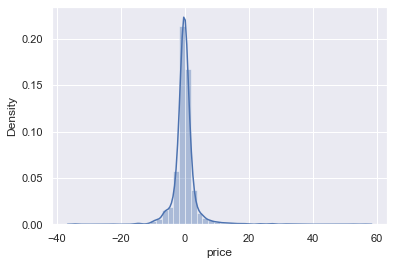

In [112]:
#Distribution plot for difference between original and predicted price
sns.distplot(y_test-pred)

The graph is normally distributed

In [116]:
#Tuning
from sklearn.model_selection import GridSearchCV
par={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
     'n_estimators':range(100,1000,100),
     'min_samples_split':range(2,10,2),
     'min_samples_leaf':range(1,10)
    }
grid=GridSearchCV(gbr,param_grid=par, cv=5,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)



Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   5.5s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   6.0s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   5.3s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   3.6s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   4.3s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   4.1s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   5.0s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   7.8s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   6.5s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   3.3s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   3.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   4.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   4.0s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   4.0s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   4.0s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   4.3s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   4.9s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   4.9s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   1.6s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   1.5s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   1.5s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   1.5s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   1.5s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   2.4s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   2.3s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   2.3s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   2.6s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=   6.4s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=   6.2s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=   6.7s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   7.1s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   7.0s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   7.2s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   7.0s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   8.1s
[CV] END loss=squared_error, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   4.1s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   4.7s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   4.9s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   6.1s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   5.5s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   5.5s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=   7.5s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=   6.8s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=   7.8s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   2.6s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   2.6s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   2.7s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   2.7s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.9s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.6s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.6s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.5s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.6s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=8, n_estimators=900; total time=   5.0s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=8, n_estimators=900; total time=   4.9s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=4, n_estimators=700; total time=   3.8s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=4, n_estimators=700; total time=   4.0s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=4, n_estimators=700; total time=   4.1s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=4, n_estimators=700; total time=   3.9s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=4, n_estimators=700; total time=   4.0s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   4.6s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   4.8s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   4.5s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   4.8s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   2.6s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   2.3s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   2.3s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   2.7s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   2.9s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   2.9s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   2.9s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   2.7s
[CV] END loss=squared_error, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   3.4s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   1.0s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   1.1s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   1.1s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   1.1s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   1.1s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   1.8s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   1.7s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   1.7s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=6, n_estimators=800; total time=   4.7s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=6, n_estimators=800; total time=   4.6s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=6, n_estimators=800; total time=   4.7s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=6, n_estimators=800; total time=   4.5s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=6, n_estimators=900; total time=   5.2s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=6, n_estimators=900; total time=   4.9s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=6, n_estimators=900; total time=   6.5s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=6, n_estimators=900; total time=   5.6s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=6, n_estimators=900; total time=   6.0s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=2, n_estimators=500; total time=   3.1s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=2, n_estimators=500; total time=   3.3s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=2, n_estimators=600; total time=   3.7s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=2, n_estimators=600; total time=   3.3s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=2, n_estimators=600; total time=   3.6s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=2, n_estimators=600; total time=   4.3s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=2, n_estimators=600; total time=   3.6s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=2, n_estimators=700; total time=   4.9s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=2, n_estimators=700; total time=   4.7s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=6, n_estimators=300; total time=   2.3s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=6, n_estimators=300; total time=   2.3s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=6, n_estimators=300; total time=   2.3s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=6, n_estimators=300; total time=   2.5s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=6, n_estimators=300; total time=   2.5s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=6, n_estimators=400; total time=   3.1s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=6, n_estimators=400; total time=   3.1s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=6, n_estimators=400; total time=   3.1s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=6, n_estimators=400; total time=   3.0s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=8, n_estimators=900; total time=   7.4s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=8, n_estimators=900; total time=   7.6s
[CV] END loss=squared_error, min_samples_leaf=6, min_samples_split=8, n_estimators=900; total time=   7.0s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=4, n_estimators=600; total time=   3.0s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=4, n_estimators=700; total time=   3.5s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=4, n_estimators=700; total time=   3.5s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=4, n_estimators=700; total time=   3.7s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=4, n_estimators=700; total time=   3.5s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=4, n_estimators=700; total time=   3.7s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=4, n_estimators=800; total time=   4.0s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=4, n_estimators=800; total time=   4.4s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=4, n_estimators=800; total time=   4.1s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   2.0s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   2.0s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   1.9s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   2.0s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   2.4s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   2.7s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   2.4s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   2.5s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   2.4s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   1.0s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   1.1s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.9s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.9s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   0.9s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=4, n_estimators=300; total time=   1.5s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=4, n_estimators=300; total time=   1.4s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   4.0s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   4.0s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   5.6s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   6.4s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   6.4s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=6, n_estimators=900; total time=   6.0s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=6, n_estimators=900; total time=   4.5s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=6, n_estimators=900; total time=   4.5s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=6, n_estimators=900; total time=   4.7s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=2, n_estimators=500; total time=   2.5s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=2, n_estimators=500; total time=   2.5s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   3.0s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   3.2s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   3.0s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   3.0s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   3.0s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   3.5s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=6, n_estimators=200; total time=   2.1s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=6, n_estimators=300; total time=   3.2s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=6, n_estimators=300; total time=   3.0s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=6, n_estimators=300; total time=   2.4s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=6, n_estimators=300; total time=   2.6s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=6, n_estimators=300; total time=   1.8s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=6, n_estimators=400; total time=   2.2s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=6, n_estimators=400; total time=   2.2s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=6, n_estimators=400; total time=   2.6s
[CV] END loss=squared_error, min_samp

[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=8, n_estimators=900; total time=   5.3s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=8, n_estimators=900; total time=   4.7s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=8, n_estimators=900; total time=   5.0s
[CV] END loss=squared_error, min_samples_leaf=9, min_samples_split=8, n_estimators=900; total time=   7.7s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END loss=absolute_error, mi

[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   5.0s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   5.7s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   5.7s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   7.0s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   9.5s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   9.4s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   9.8s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   6.3s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   7.1s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   3.2s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   2.9s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   4.2s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   5.8s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   6.0s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   5.7s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   5.9s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   6.8s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   6.8s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   7.4s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.1s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   1.8s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   1.7s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   2.0s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   9.9s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   9.3s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   7.1s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   7.1s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   6.4s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=   9.5s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  11.7s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  11.9s
[CV] END loss=absolute_error, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  10.9s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   3.4s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   3.7s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   3.4s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   5.1s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   6.5s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   6.4s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   5.9s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   4.2s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   4.5s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   1.7s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   1.7s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   1.7s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   1.7s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   1.7s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   2.6s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8, n_estimators=700; total time=   6.1s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8, n_estimators=700; total time=   5.7s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8, n_estimators=800; total time=   6.7s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8, n_estimators=800; total time=   9.7s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8, n_estimators=800; total time=  11.0s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8, n_estimators=800; total time=   9.0s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8, n_estimators=800; total time=   6.8s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8, n_estimators=900; total time=   7.5s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8, n_estimators=900; total time=   7.6s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   7.2s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   9.8s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=  12.3s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=  20.0s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=  16.1s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=  11.4s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=  11.4s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=  11.2s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   9.6s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.7s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.7s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.9s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   2.0s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   2.9s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   2.6s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   2.6s
[CV] END loss=absolute_error, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   2.5s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=  11.2s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=  12.4s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   7.6s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   7.4s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   9.7s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=  12.7s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=  12.8s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=  12.3s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=  12.4s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   7.2s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   6.9s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   7.2s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   8.3s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   8.3s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   8.3s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   8.6s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   8.0s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=  10.3s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   4.6s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   4.3s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   4.2s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   4.2s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   4.4s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   5.6s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   5.5s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=4, n_estimators=800; total time=  10.1s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=  12.2s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=  11.5s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=   8.2s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=  10.5s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=   9.6s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   1.1s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   1.1s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=8, n_estimators=600; total time=   6.7s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=8, n_estimators=600; total time=   7.1s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=8, n_estimators=600; total time=  10.5s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=8, n_estimators=600; total time=  10.5s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=8, n_estimators=600; total time=  10.5s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=  11.3s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=  11.0s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   7.9s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   6.1s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   3.2s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   3.1s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   3.0s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   4.5s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   6.6s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   6.7s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   7.1s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   6.8s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   6.3s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=6, n_estimators=900; total time=  13.8s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=6, n_estimators=900; total time=  13.4s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=6, n_estimators=900; total time=  10.6s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END loss=absolute_error, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=2, n_estimators=600; total time=   7.7s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=2, n_estimators=600; total time=  10.2s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=2, n_estimators=700; total time=  11.4s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=2, n_estimators=700; total time=  10.6s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=2, n_estimators=700; total time=  11.0s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=2, n_estimators=700; total time=  10.0s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=2, n_estimators=700; total time=  12.2s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=2, n_estimators=800; total time=   7.7s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=2, n_estimators=800; total time=   7.0s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=6, n_estimators=300; total time=   5.2s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=6, n_estimators=400; total time=   6.2s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=6, n_estimators=400; total time=   5.7s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=6, n_estimators=400; total time=   6.2s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=6, n_estimators=400; total time=   6.3s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=6, n_estimators=400; total time=   5.7s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=6, n_estimators=500; total time=   7.0s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=6, n_estimators=500; total time=   5.9s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=6, n_estimators=500; total time=   4.9s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=4, n_estimators=700; total time=   5.8s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=4, n_estimators=700; total time=   6.8s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=4, n_estimators=700; total time=   6.1s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=4, n_estimators=700; total time=   6.1s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=4, n_estimators=800; total time=   6.8s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=4, n_estimators=800; total time=   7.6s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=4, n_estimators=800; total time=  11.1s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=4, n_estimators=800; total time=  13.3s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=4, n_estimators=800; total time=   8.9s
[CV] END loss=absolute_error

[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=8, n_estimators=400; total time=   6.3s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=8, n_estimators=400; total time=   5.5s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=8, n_estimators=400; total time=   5.8s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=8, n_estimators=500; total time=   7.5s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=8, n_estimators=500; total time=   7.3s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=8, n_estimators=500; total time=   7.4s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=8, n_estimators=500; total time=   7.1s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=8, n_estimators=500; total time=   7.4s
[CV] END loss=absolute_error, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   8.2s
[CV] END loss=absolute_error

[CV] END loss=huber, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   3.4s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   3.8s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   4.9s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   5.0s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   5.7s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   5.1s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   5.2s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   6.9s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   6.7s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   7.2s
[CV] END l

[CV] END loss=huber, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   3.1s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   3.3s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   3.1s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   3.1s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   3.1s
[CV] END loss=huber, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   4.7s
[CV] END l

[CV] END loss=huber, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  14.2s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  15.9s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  15.5s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  15.0s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  14.8s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  14.5s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END l

[CV] END loss=huber, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=  13.0s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=  13.5s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=  13.0s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  14.5s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  15.9s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  15.1s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  15.3s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=  16.1s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=  19.3s
[CV] END loss=huber, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=  18.0s
[CV] END l

[CV] END loss=huber, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   6.1s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   8.6s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   9.6s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   9.5s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  10.6s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=  11.6s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=  10.9s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=  12.0s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=  11.3s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=  11.1s
[CV] END l

[CV] END loss=huber, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   6.5s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   8.1s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   9.6s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=  10.9s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=  10.1s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=  10.2s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   8.7s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=  10.3s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=  12.9s
[CV] END loss=huber, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=  10.6s
[CV] END l

[CV] END loss=huber, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   5.4s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   5.1s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   5.9s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   7.2s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   7.8s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   6.4s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   8.0s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   6.8s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   7.0s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   8.2s
[CV] END l

[CV] END loss=huber, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   3.2s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   3.1s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   3.2s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   3.1s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   3.1s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   4.8s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   4.6s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   4.7s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   5.0s
[CV] END l

[CV] END loss=huber, min_samples_leaf=4, min_samples_split=8, n_estimators=900; total time=  14.4s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=8, n_estimators=900; total time=  14.4s
[CV] END loss=huber, min_samples_leaf=4, min_samples_split=8, n_estimators=900; total time=  14.3s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END l

[CV] END loss=huber, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=  12.7s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=  12.6s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=  12.3s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   8.3s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   8.2s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=4, n_estimators=900; total time=  12.1s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=4, n_estimators=900; total time=  15.8s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=4, n_estimators=900; total time=  15.8s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=4, n_estimators=900; total time=  15.2s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=4, n_estimators=900; total time=  15.9s
[CV] END l

[CV] END loss=huber, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   9.9s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   8.8s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   7.3s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   8.4s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=  11.7s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=  12.6s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=  12.2s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=8, n_estimators=800; total time=  13.3s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=8, n_estimators=800; total time=  10.3s
[CV] END loss=huber, min_samples_leaf=5, min_samples_split=8, n_estimators=800; total time=   8.5s
[CV] END l

[CV] END loss=huber, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   7.5s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   8.0s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   7.7s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   8.0s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=4, n_estimators=600; total time=   6.6s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=4, n_estimators=600; total time=   6.2s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=4, n_estimators=600; total time=   5.9s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=4, n_estimators=600; total time=   6.0s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=4, n_estimators=600; total time=   6.2s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=4, n_estimators=700; total time=   9.9s
[CV] END l

[CV] END loss=huber, min_samples_leaf=6, min_samples_split=8, n_estimators=300; total time=   4.6s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=8, n_estimators=400; total time=   6.4s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=8, n_estimators=400; total time=   6.2s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=8, n_estimators=400; total time=   6.4s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=8, n_estimators=400; total time=   6.3s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=8, n_estimators=400; total time=   5.3s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   5.1s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   4.9s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   5.0s
[CV] END loss=huber, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   5.3s
[CV] END l

[CV] END loss=huber, min_samples_leaf=7, min_samples_split=4, n_estimators=200; total time=   2.4s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=4, n_estimators=200; total time=   2.1s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=4, n_estimators=200; total time=   2.2s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   3.6s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   3.6s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   3.3s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   3.5s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   3.5s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   8.0s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   9.0s
[CV] END l

[CV] END loss=huber, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   2.3s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   2.6s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   2.8s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   2.3s
[CV] END loss=huber, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   2.7s
[CV] END l

[CV] END loss=huber, min_samples_leaf=8, min_samples_split=2, n_estimators=800; total time=  12.5s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=2, n_estimators=800; total time=  14.1s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=2, n_estimators=900; total time=  13.9s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=2, n_estimators=900; total time=  13.7s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=2, n_estimators=900; total time=  10.9s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=2, n_estimators=900; total time=  11.7s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=2, n_estimators=900; total time=  11.5s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   1.2s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   1.1s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   1.1s
[CV] END l

[CV] END loss=huber, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   8.0s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   7.6s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   7.8s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   7.8s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   9.3s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   9.1s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   8.9s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   9.4s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   8.9s
[CV] END loss=huber, min_samples_leaf=8, min_samples_split=6, n_estimators=900; total time=  10.7s
[CV] END l

[CV] END loss=huber, min_samples_leaf=9, min_samples_split=2, n_estimators=500; total time=   5.7s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   7.7s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   6.5s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   6.6s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   6.4s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   6.9s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   7.5s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   7.7s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   8.4s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   9.8s
[CV] END l

[CV] END loss=huber, min_samples_leaf=9, min_samples_split=6, n_estimators=400; total time=   4.1s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=6, n_estimators=400; total time=   4.1s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=6, n_estimators=400; total time=   4.4s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=6, n_estimators=500; total time=   5.2s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=6, n_estimators=500; total time=   5.1s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=6, n_estimators=500; total time=   5.6s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=6, n_estimators=500; total time=   5.1s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=6, n_estimators=500; total time=   5.1s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   6.5s
[CV] END loss=huber, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   6.1s
[CV] END l

[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.5s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.5s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.6s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.6s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.4s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.4s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.6s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.5s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.6s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=2, n_estimators=400;

[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.8s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.7s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.7s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.7s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.6s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=6, n_estimators=300;

[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=8, n_estimators=800; total time=   8.5s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=8, n_estimators=800; total time=   8.3s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=8, n_estimators=800; total time=   7.6s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=8, n_estimators=900; total time=   7.9s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=8, n_estimators=900; total time=   7.6s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=8, n_estimators=900; total time=   7.9s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=8, n_estimators=900; total time=   7.7s
[CV] END loss=quantile, min_samples_leaf=1, min_samples_split=8, n_estimators=900; total time=   8.4s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=2, n_estimators=100;

[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   6.3s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   5.9s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time=   6.5s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time=   6.6s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time=   6.4s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time=   6.8s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=4, n_estimators=700; total time=   6.5s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   7.2s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   7.1s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=4, n_estimators=800;

[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=8, n_estimators=400; total time=   3.6s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   4.6s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   4.4s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   4.5s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   4.7s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   4.9s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=8, n_estimators=600; total time=   5.4s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=8, n_estimators=600; total time=   6.6s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=8, n_estimators=600; total time=   6.4s
[CV] END loss=quantile, min_samples_leaf=2, min_samples_split=8, n_estimators=600;

[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   3.4s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   2.9s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   3.5s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   2.8s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   3.1s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   4.1s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   4.7s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   4.1s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   4.5s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=4, n_estimators=400;

[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.2s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.3s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.1s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.1s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.2s
[CV] END loss=quantile, min_samples_leaf=3, min_samples_split=8, n_estimators=300;

[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   7.7s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   8.2s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   8.3s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=2, n_estimators=900; total time=   9.5s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=2, n_estimators=900; total time=   8.8s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=2, n_estimators=900; total time=   9.2s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=2, n_estimators=900; total time=   8.8s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=2, n_estimators=900; total time=   9.1s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=4, n_estimators=100;

[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=6, n_estimators=600; total time=   5.2s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=6, n_estimators=600; total time=   5.2s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   6.9s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   8.0s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   6.6s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   6.4s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   6.2s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=6, n_estimators=800; total time=   7.0s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=6, n_estimators=800; total time=   7.2s
[CV] END loss=quantile, min_samples_leaf=4, min_samples_split=6, n_estimators=800;

[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   4.1s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   5.2s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   5.4s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   5.1s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   4.7s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   4.6s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   5.1s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   5.2s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   5.7s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=2, n_estimators=600;

[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   2.8s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   3.3s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   4.2s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   3.7s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   3.8s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=6, n_estimators=400; total time=   3.5s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=6, n_estimators=400; total time=   3.6s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=6, n_estimators=400; total time=   3.5s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=6, n_estimators=400; total time=   4.4s
[CV] END loss=quantile, min_samples_leaf=5, min_samples_split=6, n_estimators=400;

[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=2, n_estimators=300;

[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=4, n_estimators=800; total time=   8.6s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=4, n_estimators=800; total time=   9.7s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=4, n_estimators=800; total time=  10.5s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=  11.0s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=   9.4s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=   8.6s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=   8.5s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=   8.4s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=6, n_estimators=100;

[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=8, n_estimators=600; total time=   5.9s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=8, n_estimators=600; total time=   6.3s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   7.5s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   6.5s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   7.5s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   7.3s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=8, n_estimators=700; total time=   6.5s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=8, n_estimators=800; total time=   8.5s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=8, n_estimators=800; total time=   8.8s
[CV] END loss=quantile, min_samples_leaf=6, min_samples_split=8, n_estimators=800;

[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   3.8s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   5.2s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   5.2s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   5.0s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   4.6s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   5.1s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=4, n_estimators=600; total time=   5.8s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=4, n_estimators=600; total time=   6.7s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=4, n_estimators=600; total time=   6.1s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=4, n_estimators=600;

[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   2.7s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   3.1s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   3.1s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   3.3s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   3.3s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   3.9s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   4.2s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   4.4s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   4.6s
[CV] END loss=quantile, min_samples_leaf=7, min_samples_split=8, n_estimators=400;

[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   2.2s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   2.3s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   2.3s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   2.0s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=4, n_estimators=200; total time=   2.5s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=4, n_estimators=300;

[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   7.9s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   7.7s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   7.2s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=6, n_estimators=900; total time=   8.7s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=6, n_estimators=900; total time=   8.7s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=6, n_estimators=900; total time=   9.0s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=6, n_estimators=900; total time=   9.5s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=6, n_estimators=900; total time=   9.3s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END loss=quantile, min_samples_leaf=8, min_samples_split=8, n_estimators=100;

[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   6.0s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=2, n_estimators=600; total time=   6.7s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   7.1s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   7.8s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   7.2s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   8.5s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   7.6s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=2, n_estimators=800; total time=   9.1s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=2, n_estimators=800; total time=   8.1s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=2, n_estimators=800;

[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=6, n_estimators=400; total time=   3.5s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=6, n_estimators=500; total time=   4.5s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=6, n_estimators=500; total time=   4.3s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=6, n_estimators=500; total time=   4.4s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=6, n_estimators=500; total time=   4.4s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=6, n_estimators=500; total time=   4.7s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   5.2s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   5.1s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   5.4s
[CV] END loss=quantile, min_samples_leaf=9, min_samples_split=6, n_estimators=600;

Now we got the best parameters.

In [117]:
gbr_tuned=GradientBoostingRegressor(min_samples_split=8, n_estimators=900,min_samples_leaf=1,loss='squared_error')
gbr_tuned.fit(x_train,y_train)
pred=gbr_tuned.predict(x_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')

 mean_absolute_error: 1.1821902700550044
 mean_squared_error: 7.040342020428704
 r2_score: 0.9032544803283724 


The accuracy improved from 78% to 90%

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


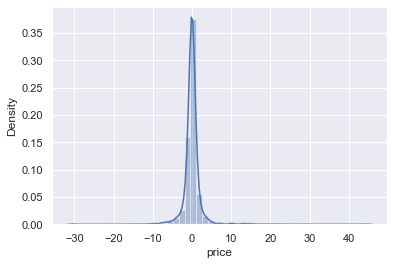

In [118]:
sns.distplot(y_test-pred)

It is normally distributed

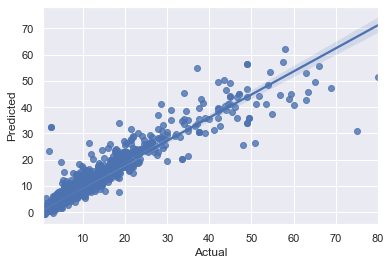

In [122]:
results=pd.DataFrame({'Actual':y_test, 'Predicted':pred})
sns.regplot(x='Actual',y='Predicted',data=results)

From above we can see, the predicted values are more deviated for high cost cars

In [123]:
results.sample(10)

Actual  Predicted
11259    5.80       5.16
9981     4.95       4.73
2555     4.65       5.17
5163     5.20       5.14
3033    13.50      17.51
10622    3.80       3.38
10752    9.12       6.73
7564     2.65       2.84
11485   14.15      10.56
4229    10.70      12.10

In [125]:
#Saving the model as obj file
import pickle
file=open('car_price_prediction.pkl','wb')
pickle.dump(gbr_tuned,file)